In [1]:
# coding: utf-8
import sys
sys.path.append('../예제/ch07')
sys.path.append('../예제')
import numpy as np
import matplotlib.pyplot as plt
from dataset import sequence
from common.optimizer import Adam
from common.trainer import Trainer
from common.util import eval_seq2seq
from seq2seq import Seq2seq
from peeky_seq2seq import PeekySeq2seq

In [2]:
# 데이터셋 읽기
(x_train, t_train), (x_test, t_test) = sequence.load_data('addition.txt')
char_to_id, id_to_char = sequence.get_vocab()

# 입력 반전 여부 설정 =============================================
is_reverse = False  # True
if is_reverse:
    x_train, x_test = x_train[:, ::-1], x_test[:, ::-1]
# ================================================================

# 하이퍼파라미터 설정
vocab_size = len(char_to_id)
wordvec_size = 16
hidden_size = 128
batch_size = 128
max_epoch = 25
max_grad = 5.0

In [3]:
# 일반 혹은 엿보기(Peeky) 설정 =====================================
#model = Seq2seq(vocab_size, wordvec_size, hidden_size)
model = PeekySeq2seq(vocab_size, wordvec_size, hidden_size)
# ================================================================
optimizer = Adam()
trainer = Trainer(model, optimizer)

acc_list = []
for epoch in range(max_epoch):
    trainer.fit(x_train, t_train, max_epoch=1,
                batch_size=batch_size, max_grad=max_grad)

    correct_num = 0
    for i in range(len(x_test)):
        question, correct = x_test[[i]], t_test[[i]]
        verbose = i < 10
        correct_num += eval_seq2seq(model, question, correct,
                                    id_to_char, verbose, is_reverse)

    acc = float(correct_num) / len(x_test)
    acc_list.append(acc)
    print('검증 정확도 %.3f%%' % (acc * 100))

| 에폭 1 |  반복 1 / 351 | 시간 0[s] | 손실 2.57
| 에폭 1 |  반복 21 / 351 | 시간 1[s] | 손실 2.49
| 에폭 1 |  반복 41 / 351 | 시간 2[s] | 손실 2.20
| 에폭 1 |  반복 61 / 351 | 시간 3[s] | 손실 1.96
| 에폭 1 |  반복 81 / 351 | 시간 4[s] | 손실 1.84
| 에폭 1 |  반복 101 / 351 | 시간 5[s] | 손실 1.80
| 에폭 1 |  반복 121 / 351 | 시간 7[s] | 손실 1.79
| 에폭 1 |  반복 141 / 351 | 시간 8[s] | 손실 1.77
| 에폭 1 |  반복 161 / 351 | 시간 9[s] | 손실 1.77
| 에폭 1 |  반복 181 / 351 | 시간 10[s] | 손실 1.76
| 에폭 1 |  반복 201 / 351 | 시간 11[s] | 손실 1.76
| 에폭 1 |  반복 221 / 351 | 시간 12[s] | 손실 1.75
| 에폭 1 |  반복 241 / 351 | 시간 14[s] | 손실 1.76
| 에폭 1 |  반복 261 / 351 | 시간 15[s] | 손실 1.75
| 에폭 1 |  반복 281 / 351 | 시간 16[s] | 손실 1.74
| 에폭 1 |  반복 301 / 351 | 시간 17[s] | 손실 1.73
| 에폭 1 |  반복 321 / 351 | 시간 18[s] | 손실 1.73
| 에폭 1 |  반복 341 / 351 | 시간 19[s] | 손실 1.73
Q 77+85  
T 162 
X 107 
---
Q 975+164
T 1139
X 1011
---
Q 582+84 
T 666 
X 103 
---
Q 8+155  
T 163 
X 101 
---
Q 367+55 
T 422 
X 103 
---
Q 600+257
T 857 
X 1023
---
Q 761+292
T 1053
X 1023
---
Q 830+597
T 1427
X 1011
---

| 에폭 8 |  반복 341 / 351 | 시간 20[s] | 손실 0.71
Q 77+85  
T 162 
X 164 
---
Q 975+164
T 1139
X 1137
---
Q 582+84 
T 666 
X 665 
---
Q 8+155  
T 163 
X 160 
---
Q 367+55 
T 422 
O 422 
---
Q 600+257
T 857 
X 849 
---
Q 761+292
T 1053
X 1037
---
Q 830+597
T 1427
X 1437
---
Q 26+838 
T 864 
X 869 
---
Q 143+93 
T 236 
X 231 
---
검증 정확도 12.480%
| 에폭 9 |  반복 1 / 351 | 시간 0[s] | 손실 0.70
| 에폭 9 |  반복 21 / 351 | 시간 1[s] | 손실 0.70
| 에폭 9 |  반복 41 / 351 | 시간 2[s] | 손실 0.70
| 에폭 9 |  반복 61 / 351 | 시간 3[s] | 손실 0.70
| 에폭 9 |  반복 81 / 351 | 시간 4[s] | 손실 0.70
| 에폭 9 |  반복 101 / 351 | 시간 5[s] | 손실 0.69
| 에폭 9 |  반복 121 / 351 | 시간 7[s] | 손실 0.69
| 에폭 9 |  반복 141 / 351 | 시간 8[s] | 손실 0.68
| 에폭 9 |  반복 161 / 351 | 시간 9[s] | 손실 0.68
| 에폭 9 |  반복 181 / 351 | 시간 10[s] | 손실 0.67
| 에폭 9 |  반복 201 / 351 | 시간 11[s] | 손실 0.68
| 에폭 9 |  반복 221 / 351 | 시간 12[s] | 손실 0.67
| 에폭 9 |  반복 241 / 351 | 시간 13[s] | 손실 0.67
| 에폭 9 |  반복 261 / 351 | 시간 15[s] | 손실 0.67
| 에폭 9 |  반복 281 / 351 | 시간 16[s] | 손실 0.66
| 에폭 9 |  반복 301

| 에폭 16 |  반복 121 / 351 | 시간 7[s] | 손실 0.43
| 에폭 16 |  반복 141 / 351 | 시간 8[s] | 손실 0.44
| 에폭 16 |  반복 161 / 351 | 시간 9[s] | 손실 0.43
| 에폭 16 |  반복 181 / 351 | 시간 10[s] | 손실 0.43
| 에폭 16 |  반복 201 / 351 | 시간 11[s] | 손실 0.42
| 에폭 16 |  반복 221 / 351 | 시간 12[s] | 손실 0.43
| 에폭 16 |  반복 241 / 351 | 시간 14[s] | 손실 0.44
| 에폭 16 |  반복 261 / 351 | 시간 15[s] | 손실 0.43
| 에폭 16 |  반복 281 / 351 | 시간 16[s] | 손실 0.42
| 에폭 16 |  반복 301 / 351 | 시간 17[s] | 손실 0.43
| 에폭 16 |  반복 321 / 351 | 시간 18[s] | 손실 0.45
| 에폭 16 |  반복 341 / 351 | 시간 19[s] | 손실 0.44
Q 77+85  
T 162 
X 163 
---
Q 975+164
T 1139
X 1137
---
Q 582+84 
T 666 
X 667 
---
Q 8+155  
T 163 
X 162 
---
Q 367+55 
T 422 
O 422 
---
Q 600+257
T 857 
X 856 
---
Q 761+292
T 1053
X 1048
---
Q 830+597
T 1427
X 1429
---
Q 26+838 
T 864 
O 864 
---
Q 143+93 
T 236 
O 236 
---
검증 정확도 31.180%
| 에폭 17 |  반복 1 / 351 | 시간 0[s] | 손실 0.41
| 에폭 17 |  반복 21 / 351 | 시간 1[s] | 손실 0.41
| 에폭 17 |  반복 41 / 351 | 시간 2[s] | 손실 0.41
| 에폭 17 |  반복 61 / 351 | 시간 3[s] | 손실 0.

검증 정확도 70.660%
| 에폭 24 |  반복 1 / 351 | 시간 0[s] | 손실 0.18
| 에폭 24 |  반복 21 / 351 | 시간 1[s] | 손실 0.18
| 에폭 24 |  반복 41 / 351 | 시간 2[s] | 손실 0.18
| 에폭 24 |  반복 61 / 351 | 시간 3[s] | 손실 0.18
| 에폭 24 |  반복 81 / 351 | 시간 4[s] | 손실 0.17
| 에폭 24 |  반복 101 / 351 | 시간 5[s] | 손실 0.18
| 에폭 24 |  반복 121 / 351 | 시간 7[s] | 손실 0.17
| 에폭 24 |  반복 141 / 351 | 시간 8[s] | 손실 0.17
| 에폭 24 |  반복 161 / 351 | 시간 9[s] | 손실 0.17
| 에폭 24 |  반복 181 / 351 | 시간 10[s] | 손실 0.18
| 에폭 24 |  반복 201 / 351 | 시간 11[s] | 손실 0.18
| 에폭 24 |  반복 221 / 351 | 시간 13[s] | 손실 0.17
| 에폭 24 |  반복 241 / 351 | 시간 14[s] | 손실 0.18
| 에폭 24 |  반복 261 / 351 | 시간 15[s] | 손실 0.18
| 에폭 24 |  반복 281 / 351 | 시간 16[s] | 손실 0.17
| 에폭 24 |  반복 301 / 351 | 시간 17[s] | 손실 0.17
| 에폭 24 |  반복 321 / 351 | 시간 19[s] | 손실 0.16
| 에폭 24 |  반복 341 / 351 | 시간 20[s] | 손실 0.16
Q 77+85  
T 162 
O 162 
---
Q 975+164
T 1139
O 1139
---
Q 582+84 
T 666 
O 666 
---
Q 8+155  
T 163 
X 164 
---
Q 367+55 
T 422 
O 422 
---
Q 600+257
T 857 
O 857 
---
Q 761+292
T 1053
X 105

C:\Users\inp032\.conda\envs\yyc\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\inp032\.conda\envs\yyc\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 54253 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\inp032\.conda\envs\yyc\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\inp032\.conda\envs\yyc\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 54869 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\inp032\.conda\envs\yyc\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\inp032\.conda\envs\yyc\lib\site-packages\matplotlib\backends\backend_agg.py:203: 

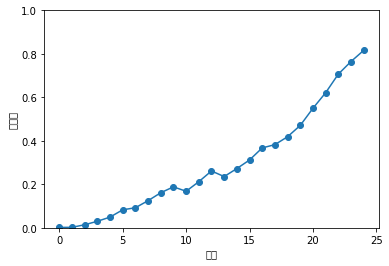

In [4]:
# 그래프 그리기
x = np.arange(len(acc_list))
plt.plot(x, acc_list, marker='o')
plt.xlabel('에폭')
plt.ylabel('정확도')
plt.ylim(0, 1.0)
plt.show()